In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('synthetic_asthma_dataset.csv')
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [20]:
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [21]:
df.shape

(10000, 17)

In [22]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

In [23]:
# Suppose BMI column exists
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(bmi_category)
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level,BMI_Category
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN,Overweight
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN,Normal
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN,Underweight
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled,Underweight
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN,Obese


In [24]:
print(df['Gender'].value_counts())

Gender
Female    4814
Male      4786
Other      400
Name: count, dtype: int64


In [25]:
df.drop(['Asthma_Control_Level', 'Patient_ID','BMI'], axis=1, inplace=True)
df.head()

,Age,Gender,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,BMI_Category
0,52,Female,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Overweight
1,15,Male,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Normal
2,72,Female,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,Underweight
3,61,Male,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Underweight
4,21,Male,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,Obese


In [26]:
# make gender encoded manually
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df.head()

,Age,Gender,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,BMI_Category
0,52,1,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Overweight
1,15,0,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Normal
2,72,1,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,Underweight
3,61,0,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Underweight
4,21,0,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,Obese


In [27]:
# one-hot encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df.astype(float)
df.head()

,Age,Gender,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Smoking_Status_Former,Smoking_Status_Never,...,Air_Pollution_Level_Low,Air_Pollution_Level_Moderate,Physical_Activity_Level_Moderate,Physical_Activity_Level_Sedentary,Occupation_Type_Outdoor,Comorbidities_Diabetes,Comorbidities_Hypertension,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight
0,52.0,1.0,1.0,0.38,0.0,421.0,46.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,15.0,0.0,0.0,0.60,2.0,297.6,22.9,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72.0,1.0,0.0,0.38,0.0,303.3,15.3,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61.0,0.0,0.0,0.60,1.0,438.0,40.1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,21.0,0.0,0.0,0.82,3.0,535.0,27.7,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


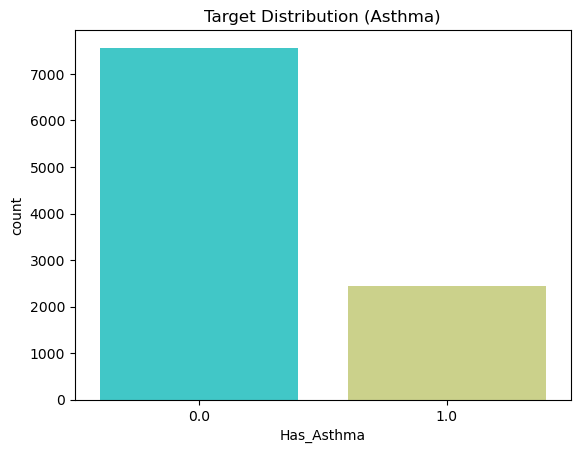

In [28]:
sns.countplot(x="Has_Asthma", data=df, palette="rainbow")
plt.title("Target Distribution (Asthma)")
plt.show()

Text(0.5, 1.0, 'Age vs Asthma')

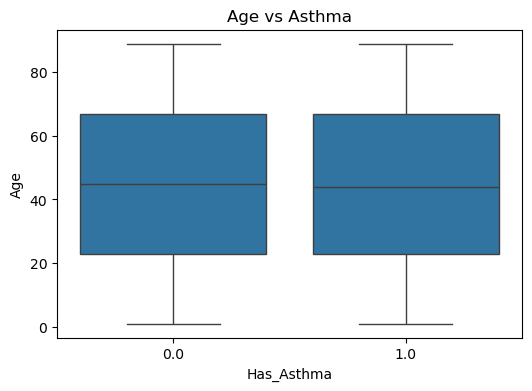

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Has_Asthma", y="Age", data=df)
plt.title("Age vs Asthma")

Text(0.5, 1.0, 'Correlation Heatmap')

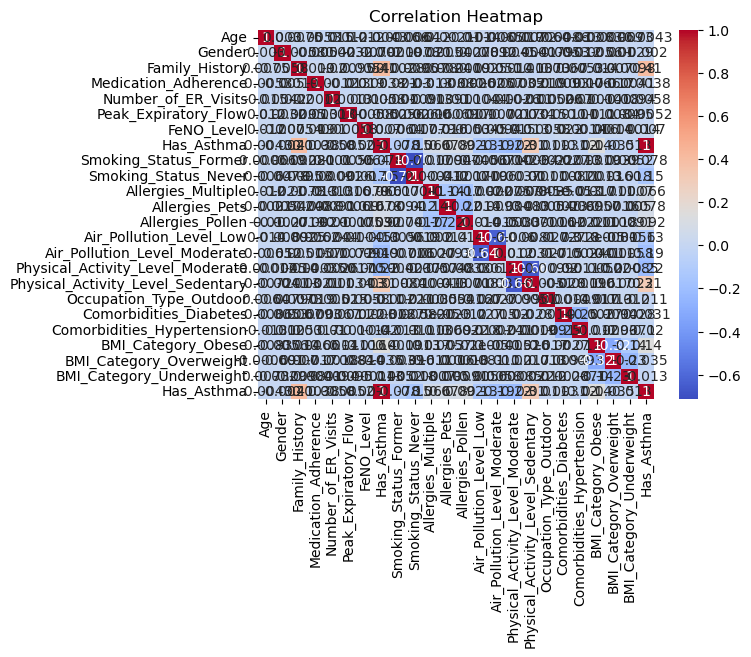

In [31]:
# Correlation Heatmap with numeric cols only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
sns.heatmap(df[num_cols + ["Has_Asthma"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
x = df.drop('Has_Asthma', axis=1)
y = df['Has_Asthma']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(x_train_scaled, y_train)

y_pred_log_reg = log_reg_model.predict(x_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nLogistic Regression Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_log_reg):.4f}")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_log = cross_val_score(log_reg_model, x, y, cv=cv, scoring='accuracy')

print("\nLogistic Regression CV scores:", scores_log)
print("Mean Logistic Regression CV accuracy:", scores_log.mean())

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1504
         1.0       0.91      0.85      0.88       496

    accuracy                           0.94      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.94      0.94      0.94      2000


Logistic Regression Accuracy Score:
0.9400

Logistic Regression CV scores: [0.9325 0.927  0.921  0.921  0.9355]
Mean Logistic Regression CV accuracy: 0.9274000000000001


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import cross_val_score, StratifiedKFold

knn_model.fit(x_train_scaled, y_train)

y_pred_knn = knn_model.predict(x_test_scaled)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nKNN Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_knn):.4f}")

scores_knn = cross_val_score(knn_model, x, y, cv=cv, scoring='accuracy')

print("\nKNN CV scores:", scores_knn)
print("Mean KNN CV accuracy:", scores_knn.mean())

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1504
         1.0       0.85      0.56      0.68       496

    accuracy                           0.87      2000
   macro avg       0.86      0.76      0.80      2000
weighted avg       0.87      0.87      0.86      2000


KNN Accuracy Score:
0.8670

KNN CV scores: [0.72   0.712  0.7085 0.7115 0.7115]
Mean KNN CV accuracy: 0.7127


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svm_model = SVC(random_state=42)
svm_model.fit(x_train_scaled, y_train)

y_pred_svm = svm_model.predict(x_test_scaled)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nSVM Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_svm):.4f}")

scores = cross_val_score(svm_model, x, y, cv=cv, scoring='accuracy')

print("\nCross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1504
         1.0       0.97      0.80      0.88       496

    accuracy                           0.94      2000
   macro avg       0.95      0.89      0.92      2000
weighted avg       0.94      0.94      0.94      2000


SVM Accuracy Score:
0.9435

Cross-validation accuracy scores: [0.757  0.757  0.7565 0.7565 0.7565]
Mean CV accuracy: 0.7567


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(x_test_scaled)

# Evaluate the model's performance
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDecision Tree Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred_dt):.4f}")
scores_dt = cross_val_score(dt_model, x_train_scaled, y_train, cv=cv, scoring='accuracy')
print("\nCross-validation accuracy scores:", scores_dt)
print("Mean CV accuracy:", scores_dt.mean())

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1504
         1.0       0.86      0.85      0.85       496

    accuracy                           0.93      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.93      0.93      0.93      2000


Decision Tree Accuracy Score:
0.9280

Cross-validation accuracy scores: [0.926875 0.930625 0.923125 0.918125 0.923125]
Mean CV accuracy: 0.9243749999999998


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train_scaled, y_train)

y_pred_rf = rf_model.predict(x_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred_rf):.4f}")
scores_rf = cross_val_score(rf_model, x, y, cv=cv, scoring='accuracy')
print("\nCross-validation accuracy scores:", scores_rf)
print("Mean CV accuracy:", scores_rf.mean())

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1504
         1.0       0.88      0.82      0.85       496

    accuracy                           0.93      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.93      0.93      0.93      2000


Accuracy Score:
0.9295

Cross-validation accuracy scores: [0.9275 0.924  0.93   0.917  0.9215]
Mean CV accuracy: 0.924


In [ ]:
import joblib
joblib.dump(scaler, "scaler.pkl")
joblib.dump(log_reg_model, "log_reg_model.pkl")
joblib.dump(x.columns.tolist(), "columns.pkl")

['columns.pkl']